In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
import os

In [3]:
%matplotlib inline

In [4]:
log_dicts = sorted(glob.glob('./FINISHED_EXPS/IWILDS_ERM/erm_logs_*/'), key= lambda x:int(x.split('_')[-1].split('/')[0]))

In [5]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [6]:
tip = {}
i=0
for prob in ['iwildcam']:
    for lr in [1e-5, 3e-5, 6e-5]:
        for ng in [2,4]:
            for ufg in ["True", "False"]:
                tip["erm_logs_{}".format(i)] = (lr, ng,ufg)
                i+=1

In [7]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    train_res_dict[logd] = read_to_dict('{}train_algo.csv'.format(logd))
    val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    if os.path.isfile('{}id_val_eval.csv'.format(logd)):
        in_test_res_dict[logd] = read_to_dict('{}id_val_eval.csv'.format(logd))

In [8]:
for logd in train_res_dict:
    train_res_dict[logd]['global_batch'] = np.max(train_res_dict[logd]['batch'])*np.array(train_res_dict[logd]['epoch']) + np.array(train_res_dict[logd]['batch'])

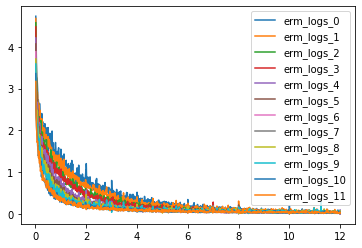

In [9]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    plt.plot(np.array(train_res_dict[logd]['global_batch'])/np.max(train_res_dict[logd]['batch']), train_res_dict[logd]['objective'], label=alg)
plt.legend()

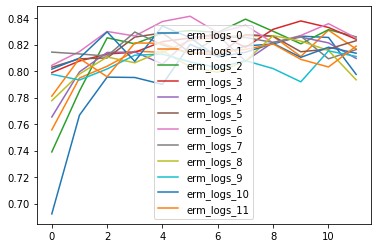

In [10]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=alg)
plt.legend()

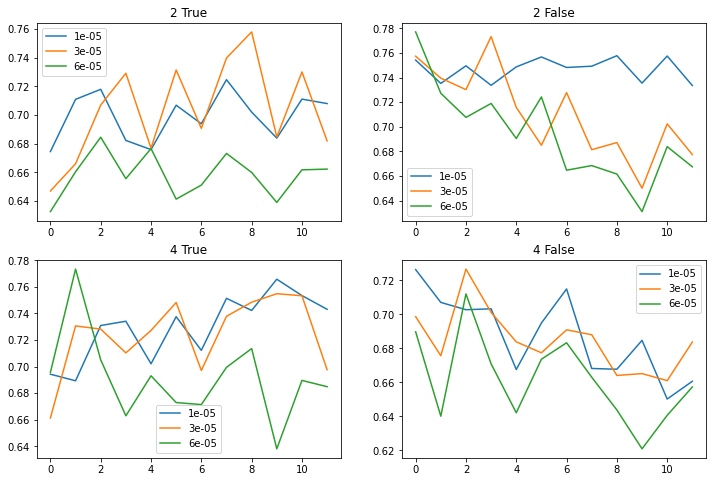

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=tip[alg][0])
for x in range(2):
    for y in range(2):
        xs = [2, 4][x]
        ys = ["True", "False"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

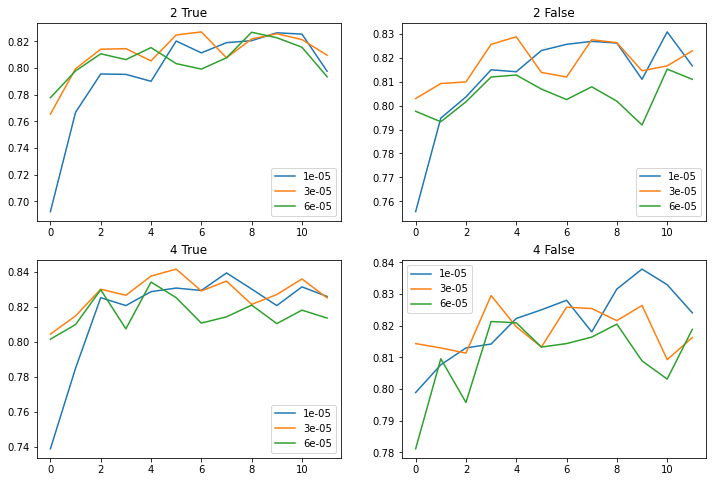

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc1,loc2].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=tip[alg][0])
for x in range(2):
    for y in range(2):
        xs = [2, 4][x]
        ys = ["True", "False"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

In [13]:
test_res_dict[logd].keys()

dict_keys(['epoch', 'acc_avg', 'recall-macro_all', 'F1-macro_all'])

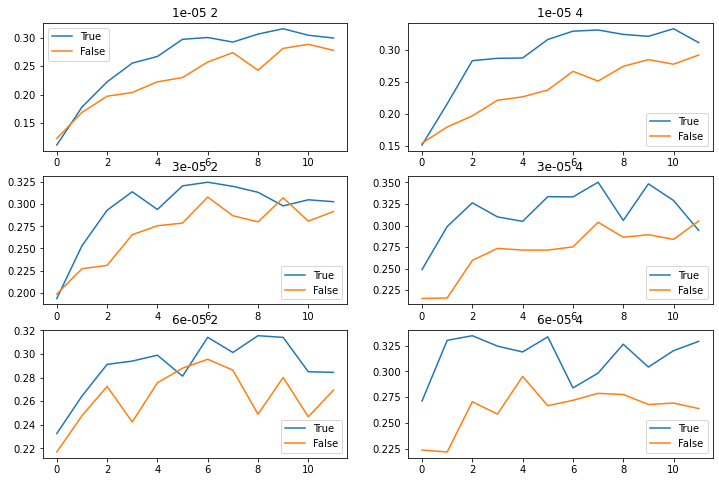

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc1].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['F1-macro_all'], label=tip[alg][2])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = [2,4][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

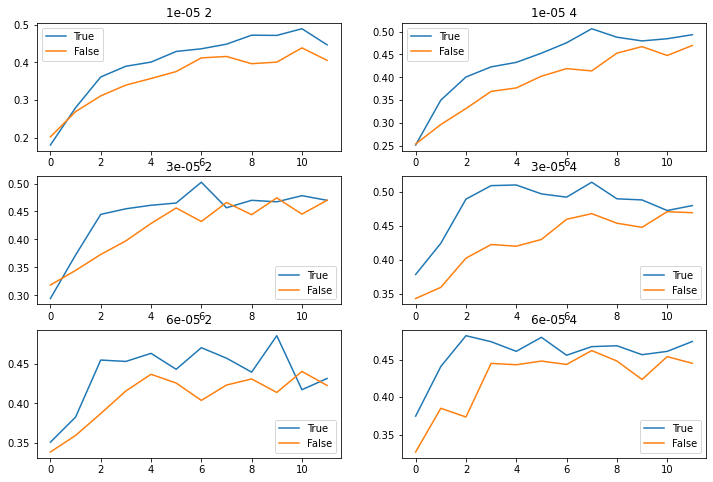

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc1].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['F1-macro_all'], label=tip[alg][2])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = [2,4][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

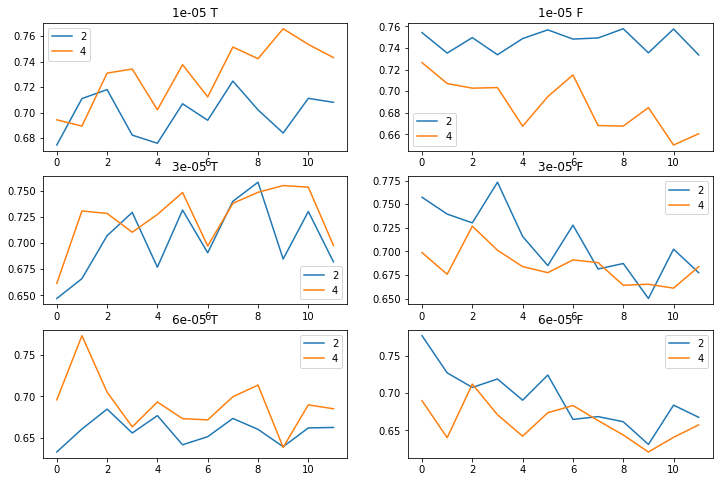

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc2].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=tip[alg][1])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = ["T","F"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

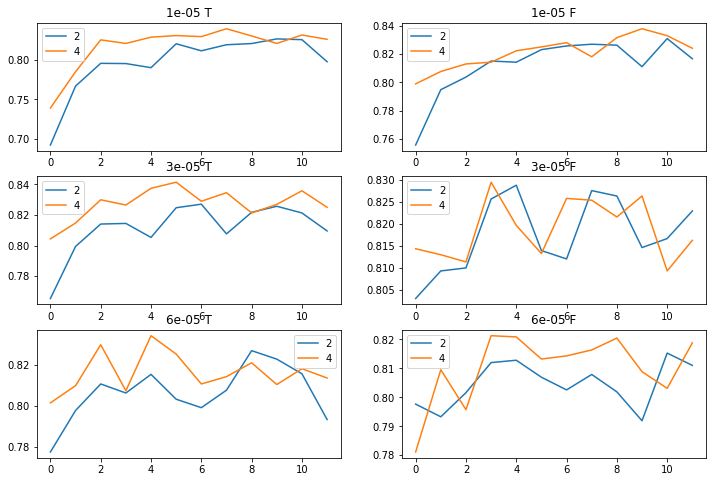

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    axs[loc0,loc2].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=tip[alg][1])
for x in range(3):
    for y in range(2):
        xs = [1e-5, 3e-5, 6e-5][x]
        ys = ["T", "F"][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

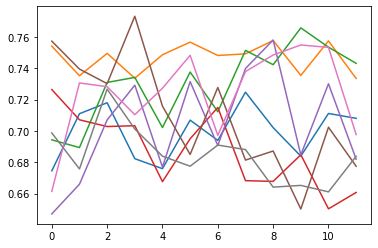

In [20]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    if loc0==2:
        continue
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=str(tip[alg]))
#plt.legend()

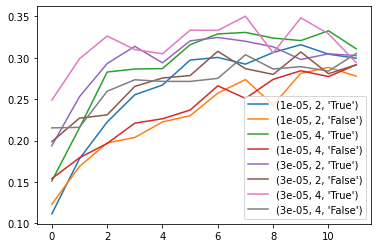

In [22]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    if loc0==2:
        continue
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['F1-macro_all'], label=str(tip[alg]))
plt.legend()

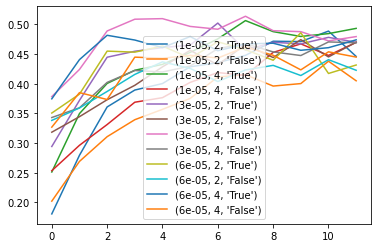

In [23]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['F1-macro_all'], label=str(tip[alg]))
plt.legend()